In [1]:
import gym
import time
from src.Entity import Entity
from src.EvolutionCtrl import Population_Manager
from src.TrainEval import TrainEval
import logging

logging.basicConfig(level=logging.INFO)

# 1) Environment
env = gym.make("BipedalWalker-v3") 
print(f"Dim. action space: {env.action_space.shape}")
print(f"Dim. observation space: {env.observation_space.shape}")

# 2) Training Params
POP_SIZE = 100
MAX_SEQUENCE_LEN = 400
N_GENERATIONS = 1500    
MUTATION_RATE = .1
#MUTATE_BIAS_GEN = 20
PROB_NODE_COPY = .1
WEIGHT_INIT_INTERVAL = [-1, 1]

n_layer_nodes = [env.observation_space.shape[0], 48, 48, 32, env.action_space.shape[0]]

init_population = [Entity(n_layer_nodes, WEIGHT_INIT_INTERVAL) for i in range(POP_SIZE)]  

pop_manager = Population_Manager(init_population, MUTATION_RATE, PROB_NODE_COPY)

train_evaluator = TrainEval()

# TODO: type checking, properties

Dim. action space: (4,)
Dim. observation space: (24,)
C:\Users\Mars\Anaconda3\envs\gym\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


INFO:root:Time for diversity calculation: 45.13600039482117


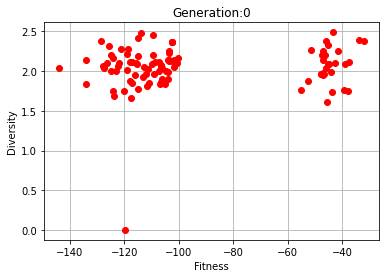

49 survived walker,max fitness: -32.055273619887664
Generation 0: 52.426998138427734
49 survived walker,max fitness: -32.055273619887664
Generation 1: 3.9680283069610596
53 survived walker,max fitness: -31.618038128257183
Generation 2: 3.7029664516448975
55 survived walker,max fitness: -31.618038128257183
Generation 3: 2.7280287742614746
48 survived walker,max fitness: -31.618038128257183
Generation 4: 3.432974100112915
48 survived walker,max fitness: -31.618038128257183
Generation 5: 3.6939964294433594
47 survived walker,max fitness: -29.29552571517656
Generation 6: 4.908010005950928
49 survived walker,max fitness: -29.29552571517656
Generation 7: 4.62302303314209
44 survived walker,max fitness: -27.06519443330909
Generation 8: 3.208000421524048
41 survived walker,max fitness: -27.06519443330909
Generation 9: 5.393968343734741
45 survived walker,max fitness: -25.669325729334254
Generation 10: 5.12699818611145
55 survived walker,max fitness: -23.14880154266932
Generation 11: 5.01621794

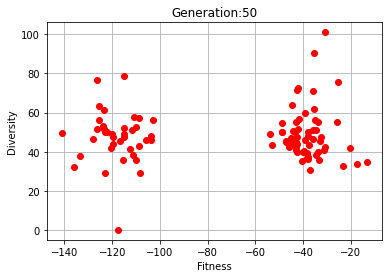

50 survived walker,max fitness: -13.368144091960195
Generation 50: 82.08705163002014
48 survived walker,max fitness: -13.368144091960195
Generation 51: 5.0720295906066895
54 survived walker,max fitness: -13.368144091960195
Generation 52: 5.10496973991394
50 survived walker,max fitness: -13.368144091960195
Generation 53: 4.614332437515259
53 survived walker,max fitness: -13.368144091960195
Generation 54: 5.297030448913574
43 survived walker,max fitness: -13.368144091960195
Generation 55: 4.356964349746704
48 survived walker,max fitness: -13.368144091960195
Generation 56: 6.0354392528533936
55 survived walker,max fitness: -13.368144091960195
Generation 57: 4.555962085723877
52 survived walker,max fitness: -13.368144091960195
Generation 58: 5.052035093307495
50 survived walker,max fitness: -13.368144091960195
Generation 59: 5.741997003555298
53 survived walker,max fitness: -13.368144091960195
Generation 60: 4.835000038146973
49 survived walker,max fitness: -13.368144091960195
Generation 6

KeyboardInterrupt: 

In [2]:
def agent_env_loop(entity):
        entity.survived = True
        entity.fitness = 0
        env.seed(10) 
        observation = env.reset()                                            # s_0
        for i in range(MAX_SEQUENCE_LEN):  
            action = entity.controller.feed_forward(observation)             # a_t, s_t            
            observation, reward, done, _ = env.step(action)                  # s_{t+1}, r_{t+1}, a_t       
            entity.fitness += reward
            if done:
                break   

# Optimize 
for generation in range(N_GENERATIONS):
    t_start = time.time() 
    for entity in pop_manager.population:
        if not entity.survived:
            agent_env_loop(entity)
    
    if generation % 50 == 0:
        train_evaluator.eval_training(pop_manager.population, generation) 
    
    pop_manager.breed_new_population(generation)

    print(f"Generation {generation}: {time.time() - t_start}")

In [12]:
pop_manager.population.sort(key=lambda x: x.fitness, reverse=True) 
best_agent = pop_manager.population[0]
best_agent.fitness

-13.368144091960195

In [13]:
env.seed(10) 
observation = env.reset()
for _ in range(MAX_SEQUENCE_LEN):
    env.render()
    action = best_agent.controller.feed_forward(observation)            # a_t, s_t            
    observation, reward, done, _ = env.step(action)                     # s_{t+1}, r_{t+1}, a_t       
env.close()

In [35]:
class testclass(object):
    def __init__(self):
        self.weights = [[1,2,3], [4,5,6]]

x = testclass()

In [36]:
y = x.weights[0]
y

[1, 2, 3]

In [37]:
y[0] = 7

In [38]:
x.weights[0]

[7, 2, 3]

In [39]:
y

[7, 2, 3]

In [34]:
a = [1,2,3]
b = a
b[0] = 4
a

[4, 2, 3]

In [9]:
import numpy as np
np.random.uniform(-1.0, 1.0, (4, 3))

array([[ 0.08500486,  0.69602858,  0.54515709],
       [ 0.74302638,  0.37548427,  0.48805228],
       [ 0.48482226, -0.2124669 ,  0.71335525],
       [ 0.4457444 ,  0.56424148,  0.87824   ]])

In [10]:
np.random.uniform(low = -1.0, high = 1.0, size = 3)

array([0.96191887, 0.5971491 , 0.52781256])